In [54]:
import os
os.system('cls' if os.name == 'nt' else 'clear')

import numpy as np
import  matplotlib.pyplot as plt
import scipy.special as sp


In [55]:
def qpsk_mod(bits):
    #mapping
    mapping = {
        (0,0,0,0): 2+2j,
        (0,0,0,1):2j,
        (0,0,1,0):0,
        (0,0,1,1):2,
        (0,1,0,0):-2+2j,
        (0,1,0,1):-2,
        (0,1,1,0):-2-2j,
        (0,1,1,1):-2j,
        (1,0,0,0):2-2j
    }

    #modulation
    symbols=np.array([])
    for i in range(0,len(bits),4):
        bit_pair=(bits[i],bits[i+1],bits[i+2],bits[i+3])
        symbols=np.append(symbols,mapping[bit_pair])
    #print("mod",modulated_bits)
    return symbols




In [56]:
def awgn(symbols, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    noise_variance = 1 / (2 * snr_linear)
    noise = np.sqrt(noise_variance) * (np.random.randn(*symbols.shape) + 1j * np.random.randn(*symbols.shape))
    return symbols + noise

In [57]:
def qpsk_demod(received_signal):
    symbols = {
        2 + 2j: (0, 0,0,0),
        2j: (0,0,0, 1),
        0: (0,0,1, 0),
        2: (0,0,1, 1),
        -2+2j:(0,1,0,0),
        -2:(0,1,0,1),
        -2-2j:(0,1,1,0),
        -2j:(0,1,1,1),
        2-2j:(1,0,0,0)
    }

    #demodulation
    demodulated_bits=np.array([])
    for i in received_signal:
        closest_symbol = min(symbols.keys(), key=lambda s: np.abs(i - s))
        demodulated_bits=np.append(demodulated_bits,(symbols[closest_symbol]))
    #    print(np.array(demodulated_bits))

    received_signal1=np.array([int(i)  for i in demodulated_bits])
    #converting into int just for appearance
    return received_signal1


In [58]:
def calculate_ber(msg_bits, demodulated_bits):
    return np.mean(msg_bits != demodulated_bits)


In [59]:
def simulate_ber_vs_snr(snr_db_range, msg_bits):
    ber = []
    for snr_db in snr_db_range:
        # Modulate the bit sequence
        transmitted_signal =qpsk_mod(msg_bits)
        
        # in channel
        received_signal = awgn(transmitted_signal,snr_db)
        
        # Demodulate the received signal
        demodulated_bits =qpsk_demod(received_signal)
        
        # Calculate BER
        ber.append(calculate_ber(msg_bits, demodulated_bits))
        
    return ber

In [60]:
def generate_4_bit_number():
    # Generate a random integer between 0 and 15 (inclusive) for true 4-bit numbers
    number = np.random.randint(0, 9)
    
    # Convert the number to its 4-bit binary representation
    binary_representation = format(number, '04b')
    
    return binary_representation

no_of_bits = 16000
msg_bits = []

for i in range(no_of_bits):
    a = generate_4_bit_number()
    msg_bits.append(a)

# Convert msg_bits to a 2D numpy array, then flatten to 1D
msg_bits_array = np.array([list(bits) for bits in msg_bits])
msg_bits_flattened = msg_bits_array.flatten()

# Convert the 1D array of binary bits from strings to integers
msg_bits1 = np.array([int(bit) for bit in msg_bits_flattened])

# Convert the 1D array of binary bits from strings to integers
msg_bits = np.array([int(bit) for bit in msg_bits1])
print(msg_bits,len(msg_bits))
type(msg_bits)

[0 0 0 ... 1 1 1] 64000


numpy.ndarray

In [61]:
snr_db_range = np.arange(0,12, 1)  # SNR range from 0 dB to 20 dB

# Simulate and get BER for different SNR values
ber_qpsk_simulated= simulate_ber_vs_snr(snr_db_range, msg_bits)

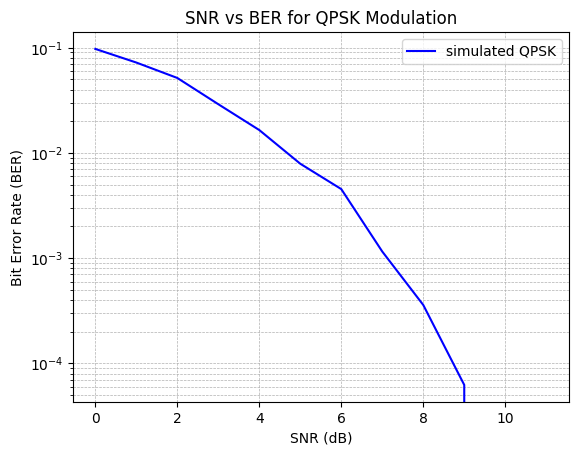

In [62]:
#theoritical ber vs snr
snr=10**(snr_db_range / 10)
ber_qpsk_theory= 0.5*(sp.erfc(np.sqrt(0.5*snr)))

ber_bpsk_theory= 0.5*(sp.erfc(np.sqrt(2*snr)))

# Plot SNR vs BER
#plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, ber_qpsk_simulated,  linestyle='-', color='b', label='simulated QPSK')
#plt.semilogy(snr_db_range, ber_qpsk_theory,  linestyle='--', color='g', label='theoreitical QPSK')
#plt.semilogy(snr_db_range, ber_bpsk_theory,  linestyle='--', color='r', label='theoreitical BPSK')
plt.legend()
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('SNR vs BER for QPSK Modulation')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()